# SPAM DETECTOR

My Jupyter Notebook: https://github.com/alex80ds/Boulder-CU/blob/main/Spam_detector.ipynb

My PDF: https://github.com/alex80ds/Boulder-CU/blob/main/Spam_detector.pdf

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alex80ds/Boulder-CU/main/spam_detector.csv", encoding='latin1')

## EDA

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.rename(columns = {"v1": "target", "v2": "text"}, inplace = True)

df.drop(["Unnamed: 2","Unnamed: 3", "Unnamed: 4"], axis = 1, inplace = True)

In [5]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.describe()

,target,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.duplicated().sum()

403

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

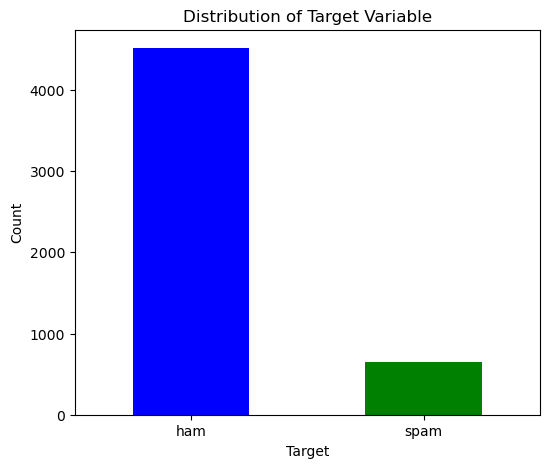

In [11]:
import matplotlib.pyplot as plt

target_counts = df['target'].value_counts()

plt.figure(figsize=(6, 5))
target_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


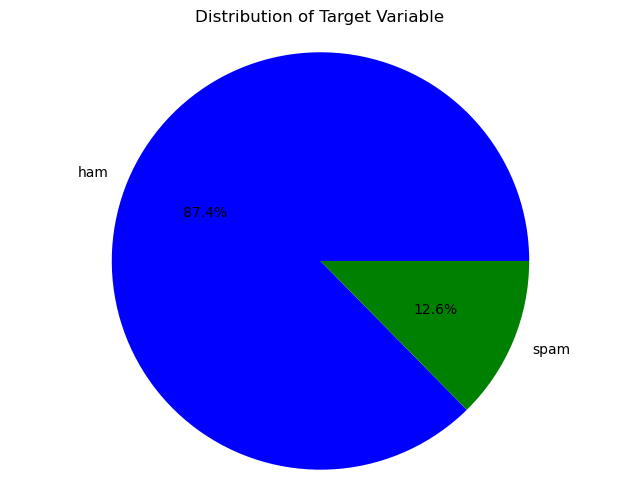

In [12]:
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['blue', 'green'])
plt.title('Distribution of Target Variable')
plt.axis('equal') 
plt.show()

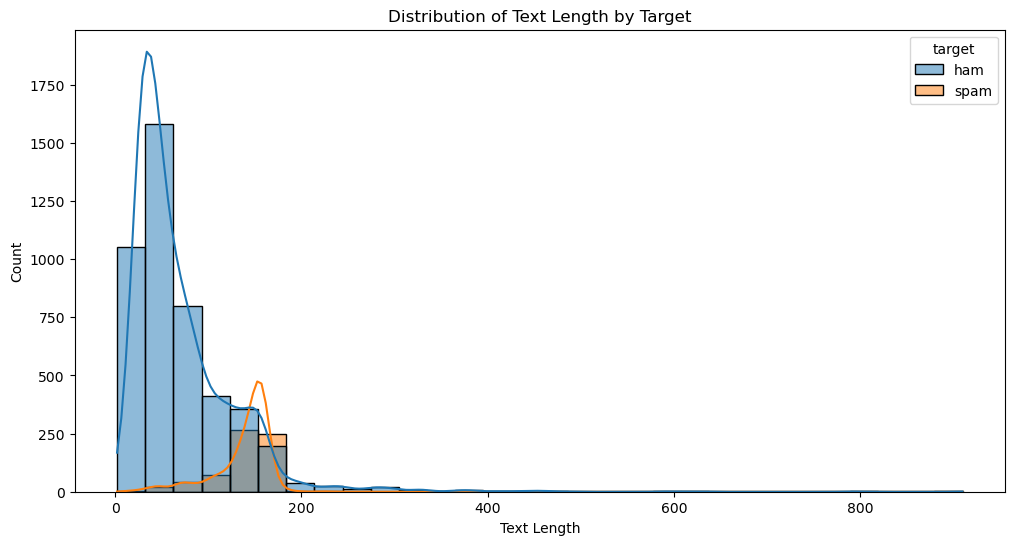

In [13]:
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', hue='target', bins=30, kde=True)
plt.title('Distribution of Text Length by Target')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

## DATA PREPROCESSING

In [14]:
import re
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
def preprocess_text(text):

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\w\s\d]', '', text)
    
    tokens = word_tokenize(text)

    clean_tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens if re.sub(r'[^a-zA-Z0-9]', '', token)]

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in clean_tokens if token not in stop_words]

    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    preprocessed_text = ' '.join(stemmed_tokens)
    
    return preprocessed_text

df['text'] = df['text'].apply(preprocess_text)

df

,target,text,text_length
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri wkli comp win fa cup final tkt may ...,155
3,ham,u dun say earli hor u c alreadi say,49
4,ham,nah think goe usf live around though,61
...,...,...,...
5567,spam,time tri contact u u pound prize claim easi ca...,161
5568,ham,b go esplanad fr home,37
5569,ham,piti mood suggest,57
5570,ham,guy bitch act like interest buy someth els nex...,125


## BUILDING MODEL

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [19]:
label_encoder = LabelEncoder()
df['target_encoded'] = label_encoder.fit_transform(df['target'])


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])


max_sequence_length = max([len(seq) for seq in sequences])
sequences_padded = pad_sequences(sequences, maxlen=max_sequence_length)


X_train, X_test, y_train, y_test = train_test_split(sequences_padded, df['target_encoded'], test_size=0.2, random_state=42)


embedding_dim = 50
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8668 - loss: 0.3818 - val_accuracy: 0.8924 - val_loss: 0.1624
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9193 - loss: 0.1591 - val_accuracy: 0.9710 - val_loss: 0.1223
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9805 - loss: 0.1172 - val_accuracy: 0.9782 - val_loss: 0.1144
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9917 - loss: 0.1008 - val_accuracy: 0.9758 - val_loss: 0.1066
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9963 - loss: 0.0543 - val_accuracy: 0.9831 - val_loss: 0.0607
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9987 - loss: 0.0120 - val_accuracy: 0.9867 - val_loss: 0.0550
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9983 - loss: 0.0117 - val_accuracy: 0.9855 - val_loss: 0.0490
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9995 - loss: 0.0058 - val_accuracy: 0.9794 - val_loss

## CONCLUSION

Based on the test results of the text classification model:

High Accuracy: The model achieved a test accuracy of approximately 98.16%, indicating that it can effectively classify text messages into their respective categories (e.g., spam or ham).

Effective Generalization: The high accuracy on the test set suggests that the model has generalized well to unseen data, which is essential for real-world applications.

Potential for Real-World Use: With its high accuracy, the model shows promise for real-world use cases such as spam detection in emails or text messages. It could potentially help in filtering out unwanted messages and improving user experience.

Further Analysis: While accuracy is an important metric, it's essential to perform further analysis to gain deeper insights into the model's performance. This may include examining the confusion matrix, precision, recall, F1-score, ROC curve, and AUC. These analyses can provide a more comprehensive understanding of the model's behavior and any potential areas for improvement.

Model Deployment: If the model meets the requirements and performs well in various evaluation metrics, it could be considered for deployment in production environments. However, it's crucial to continuously monitor its performance and update it as necessary to maintain effectiveness over time.

In conclusion, the text classification model demonstrates strong performance in accurately categorizing text messages, making it a valuable tool for tasks such as spam detection. However, further analysis and evaluation are necessary to ensure its robustness and suitability for real-world applications.